In [1]:
#Importa o modelo da VGG19
from keras.applications.vgg19 import VGG19
from keras import models

#Dataset
from keras.datasets import cifar100

#Self Organizing Map
from minisom import MiniSom

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
#Carrega o modelo ja treinado
model = VGG19()
#model.summary()
'''
j=0
for i in model.layers[1:]:
    print(j, ' ', i.name)
    j+=1
'''

Instructions for updating:
Colocations handled automatically by placer.


"\nj=0\nfor i in model.layers[1:]:\n    print(j, ' ', i.name)\n    j+=1\n"

In [3]:
#Importa o datasett do cifar100 e concatena os elemntos de treino e teste
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
data = np.concatenate((x_train, x_test))
labels = np.concatenate((y_train, y_test))
print(data.shape)

(60000, 32, 32, 3)


In [4]:
#Função que transforma uma imagem de 32x32x3 para 224x224x3  (difference = 7)
def format_image(image, difference = 7):
    #Normaliza a imagem
    f_min, f_max = np.amin(image), np.amax(image)
    image = (image - f_min) / (f_max - f_min)
    #Cria o novo arranjo com o numero de posições desejado
    img_aux = np.empty([image.shape[0]*difference, image.shape[1]*difference, image.shape[2]])
    #Itera pela imagem original e preenche a nova imagem
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(i*difference,(i+1)*difference):
                for l in range(j*difference,(j+1)*difference):
                    img_aux[k][l] = image[i][j]
    img_aux = img_aux.reshape((1, img_aux.shape[0], img_aux.shape[1], img_aux.shape[2]))
    return img_aux

In [5]:
#Função que retorna o feature vector de uma determinada camada, dada uma imagem
def get_layer(model, image, layer_num):
    out = []
    layer_outputs = [layer.output for layer in model.layers[1:] ]
    # Extracts the outputs of the top 12 layers

    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
    # Creates a model that will return these outputs, given the model input

    layer = activation_model.predict(image)
    layer = layer[layer_num]
    layer = layer.reshape(layer.shape[1]*layer.shape[2]*layer.shape[3])
    out.append(layer)
    return out

In [6]:
#2 , (896, 896)
#5, (512,784) - 401408
#10 ,(448, 448)
#15, (392,256)
#20, (196, 128) - 25088

In [7]:
som = MiniSom(10, 10, 25088, sigma=3, learning_rate=0.05)
print('OK')

OK


In [8]:
cont = 0
for image in data[:200]:
    image = format_image(image)
    image = get_layer(model, image, 20)
    som.train(image, 1)
    if cont%20 == 0:
        print(cont)
    cont+=1

0
20
40
60
80
100
120
140
160
180


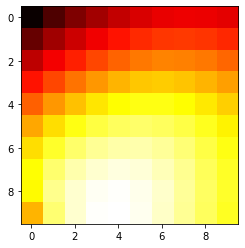

In [17]:
teste = som.activate(get_layer(model, format_image(data[8000]), 20))
teste = 1-teste;
plt.imshow(teste, cmap='hot')

In [ ]:
#TESTAR EM DIMENSOES MENORES ->SOM_MNIST